<a href="https://colab.research.google.com/github/ShwenaGoyal/Deep-learning/blob/main/Copy_of_simpleNN_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Last amended: 21st October, 2022
# fashion_mnist dataset
# https://www.kaggle.com/datasets/zalando-research/fashionmnist

In [2]:
# 1.0
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1.1
import tensorflow as tf

# 1.2 Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# 2.0 Mount google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
# 2.1 Read FASHION-MNIST data

## path = "/gdrive/MyDrive/Colab_data_files/fashion_mnist/"


In [5]:
# 2.2
data = pd.read_csv("/gdrive/MyDrive/fashion_mnist_train.csv")

In [6]:
# 2.2.1
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# 2.2.2
data.shape

(60000, 785)

In [8]:
# 2.3 Pop out target
y = data.pop('label')

In [9]:
# 2.3.1
data.shape

(60000, 784)

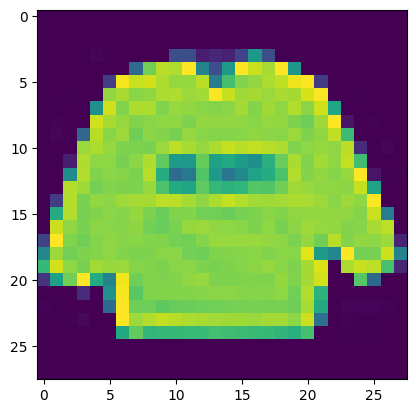

In [10]:
# 3.0
plt.imshow(data.iloc[0,:].values.reshape(28,28));         # numpy is used to reshape. pandas doesn't hv reshape function.

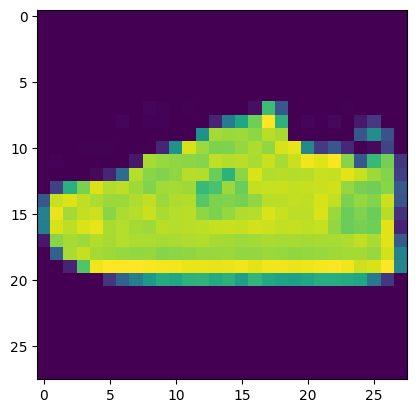

In [11]:
plt.imshow(data.iloc[59999,:].values.reshape(28,28));

In [12]:
y.nunique()

10

In [13]:
y.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(data, y ,
                                                   test_size = 0.15,
                                                   shuffle = True
                                                   )

In [15]:
X_train.shape

(51000, 784)

In [16]:
X_test.shape

(9000, 784)

In [17]:
# 3.1
#data[:2]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# 4.0           # after splitting, because x test is a future dta. we will scale x train first. before splitting done, we are leaking the information so we don't do this.
ss = StandardScaler()
ss.fit(X_train)
X_train= ss.transform(X_train)
X_test = ss.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [33]:
# 4.1
#df.shape

In [34]:
# 4.2
#np.round(df[:10],1)

## Model

In [52]:
# 5.0
mx = tf.keras.Sequential()

In [53]:
# 5.1
mx.add( tf.keras.layers.Input(shape = [784] ))

In [54]:
# 5.2
mx.add(tf.keras.layers.Dense(500, activation = 'relu'))

In [55]:
# 5.3
mx.add(tf.keras.layers.Dense(200, activation = 'relu'))

In [56]:
# softmax , output layer will have 10 neurons because there are unique 10 labels.
# We don't use sigmoid here in output layer, can use relu if the output is negative, linear is the default option and safer option..it goes from -ve to +ve.
# Whenevr there more than two outputs, we use "softmax" activation function. will give an output between 0 and 1 and sum of all these 0 & 1 will be "1".
# use as many neurons in the output layer, as there are outputs. so in this case, use 10 neurons.
# softmax is generally used for classification problems. not for regression.
# in regression the no of neuron in output layer will be 1 becuase there will always be one output. activation function will be linear.
mx.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [57]:
# 5.4 Model summary:
mx.summary()   # layer 1: 784*500 + bias = 392500, layer 2: 500*200 + 200(bias)= 110200

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 500)               392500    
                                                                 
 dense_13 (Dense)            (None, 200)               100200    
                                                                 
 dense_14 (Dense)            (None, 10)                2010      
                                                                 
Total params: 494,710
Trainable params: 494,710
Non-trainable params: 0
_________________________________________________________________


In [58]:
# 5.5 Compile model   #for accuracy or check loss
mx.compile(
                 loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics = ["accuracy"]
              )

In [ ]:
# 6.0
mx.fit(X_train,y_train, epochs = 50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1594/1594 [==============================] - 16s 10ms/step - loss: 0.4914 - accuracy: 0.8296
Epoch 2/50
1594/1594 [==============================] - 14s 9ms/step - loss: 0.4083 - accuracy: 0.8636
Epoch 3/50
1594/1594 [==============================] - 13s 8ms/step - loss: 0.3910 - accuracy: 0.8723
Epoch 4/50
1594/1594 [==============================] - 13s 8ms/step - loss: 0.3824 - accuracy: 0.8804
Epoch 5/50
1594/1594 [==============================] - 14s 8ms/step - loss: 0.3811 - accuracy: 0.8869
Epoch 6/50
1594/1594 [==============================] - 14s 9ms/step - loss: 0.3719 - accuracy: 0.8918
Epoch 7/50
1594/1594 [==============================] - 14s 9ms/step - loss: 0.3707 - accuracy: 0.8945
Epoch 8/50
1594/1594 [==============================] - 14s 9ms/step - loss: 0.3681 - accuracy: 0.9002
Epoch 9/50
1594/1594 [==============================] - 18s 11ms/step - loss: 0.3703 - accuracy: 0.9023
Epoch 10/50
1594/1594 [==============================] - 21s 13ms/step - loss: 0.3

In [ ]:
# 6.1
mx.evaluate(X_train,y_train)

In [ ]:
######################### I am done #################